In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv(r"C:\Users\omkar\AI\AIML Internship\Task2\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [129]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
df.shape

(891, 12)

In [131]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [132]:
df = df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'],axis='columns')

In [133]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [134]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [135]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

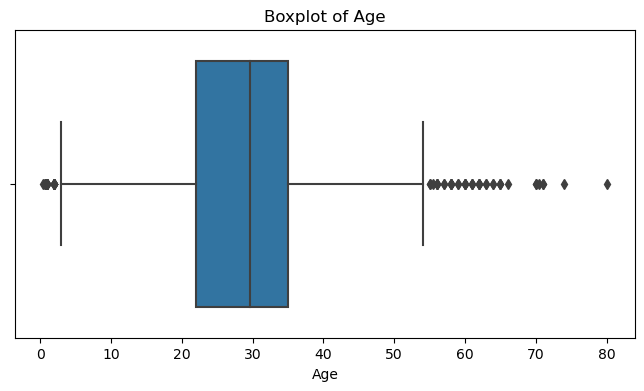

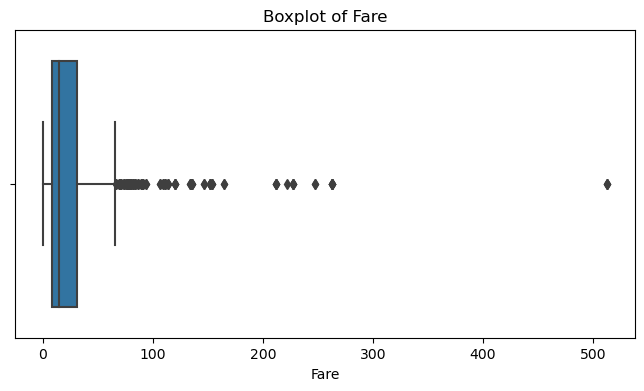

In [136]:
num_col = ['Age', 'Fare']
for column in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

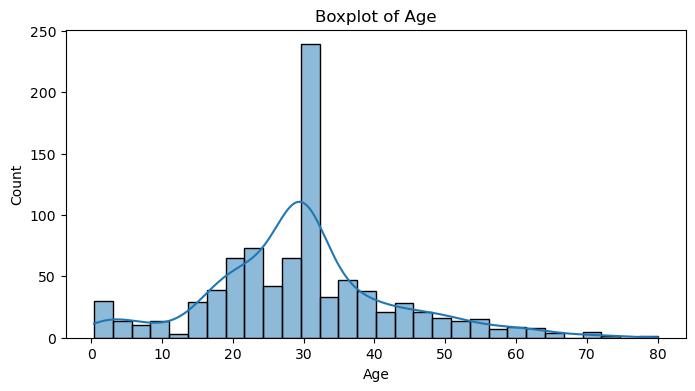

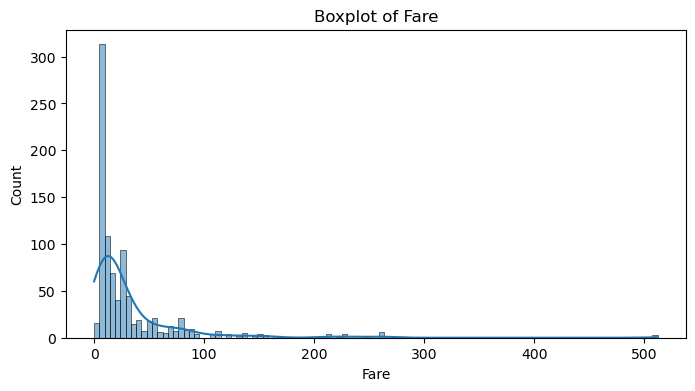

In [137]:
num_col = ['Age', 'Fare']
for column in num_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=df[column],kde=True)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [138]:
for column in num_col:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

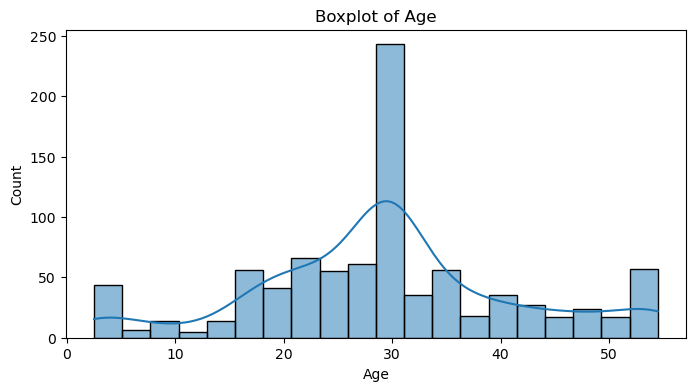

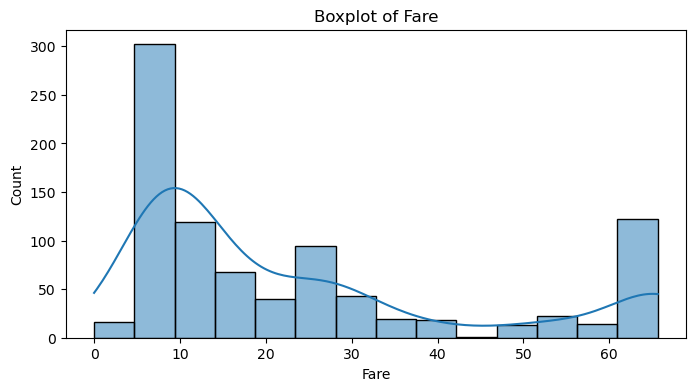

In [139]:
num_col = ['Age', 'Fare']
for column in num_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=df[column],kde=True)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df['Sex']=le.fit_transform(df['Sex'])

In [141]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,65.6344,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


C:\Users\omkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


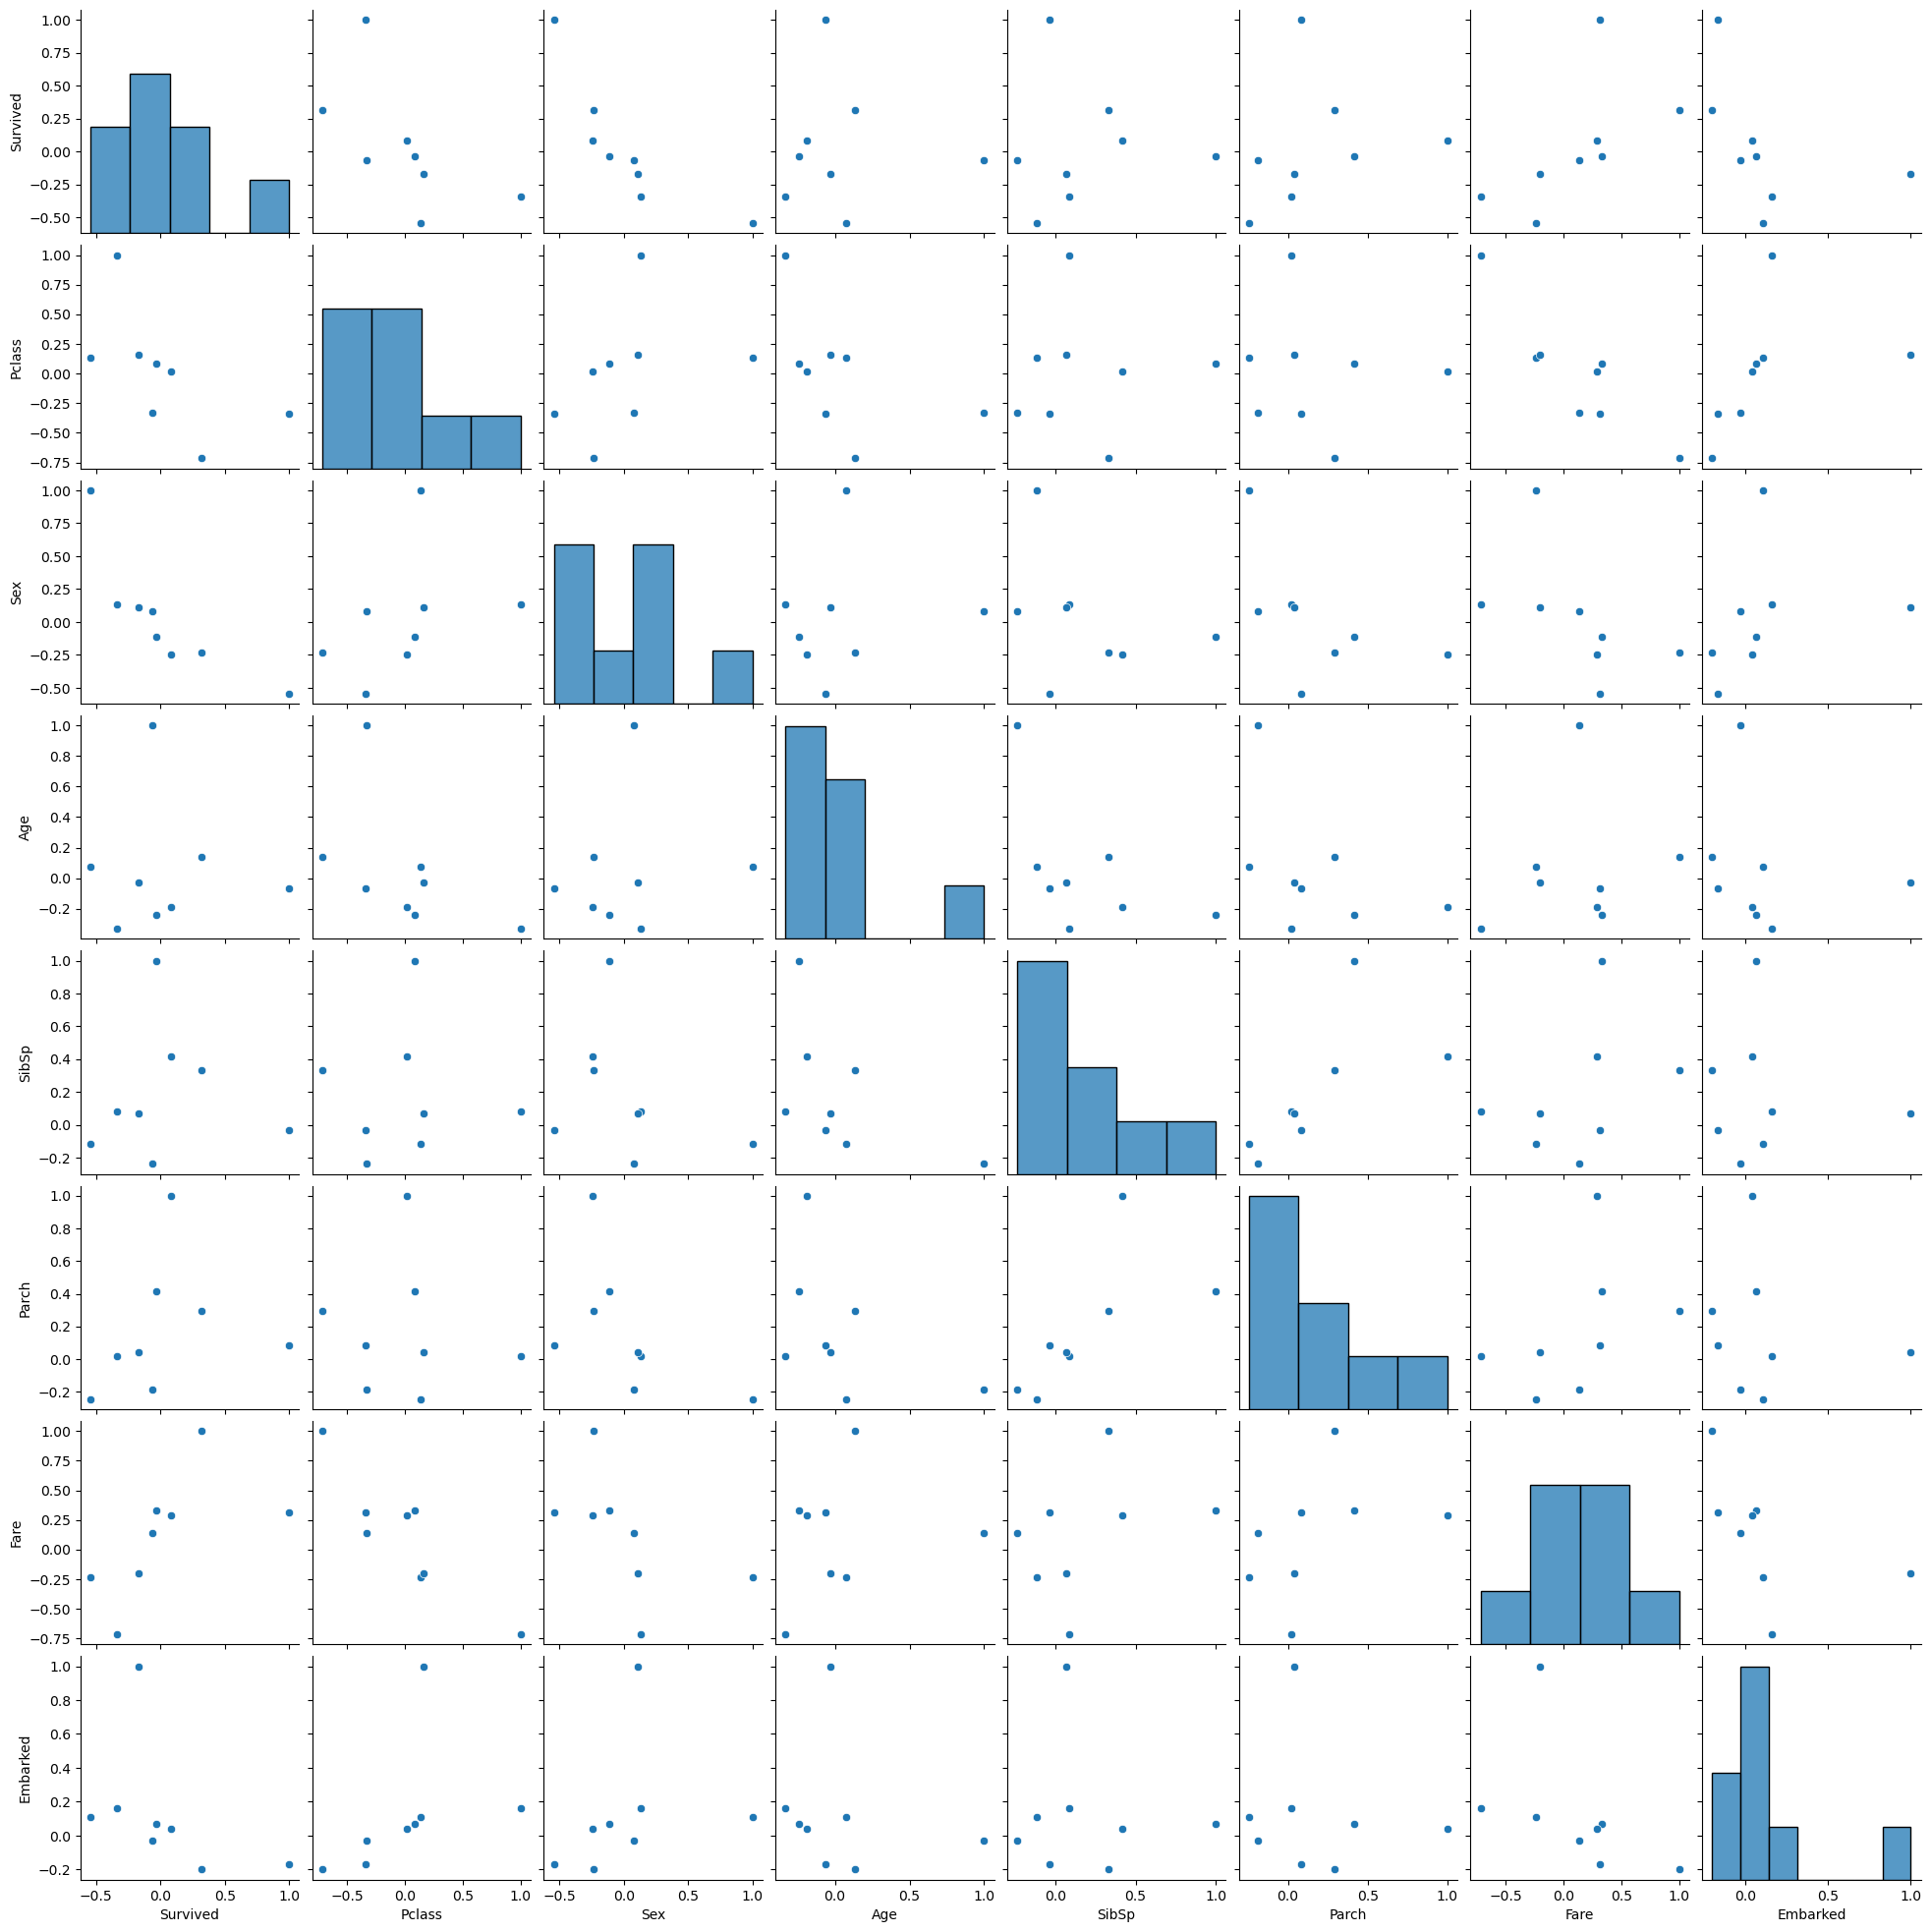

In [142]:
sns.pairplot(df.corr())

<Axes: >

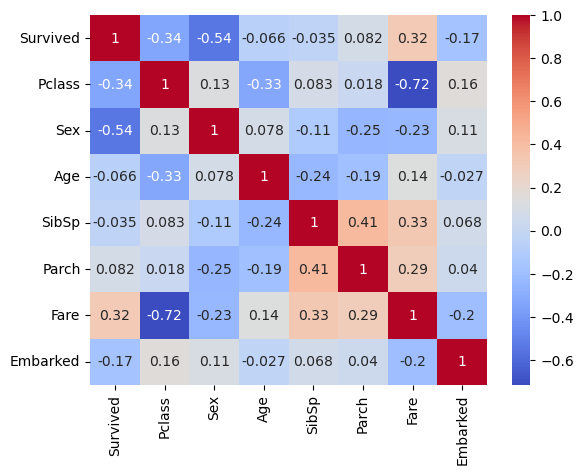

In [143]:
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'Survival Rate by Sex')

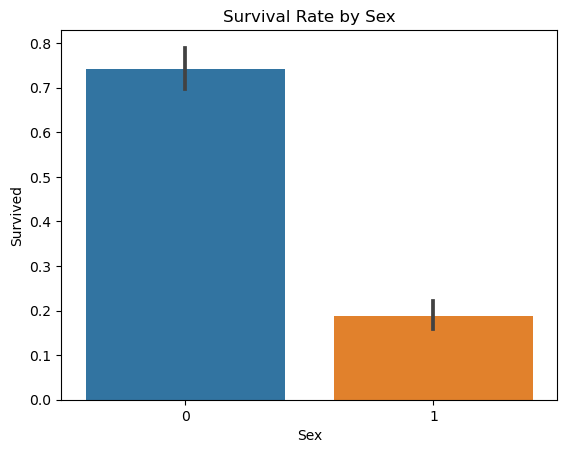

In [144]:
sns.barplot(data=df, x='Sex',y='Survived')
plt.title('Survival Rate by Sex')

Text(0.5, 1.0, 'Survival Rate by Class')

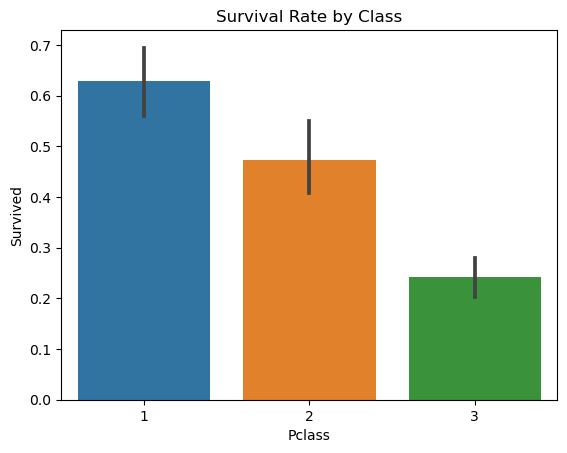

In [145]:
sns.barplot(data=df, x='Pclass',y='Survived', )
plt.title('Survival Rate by Class')

In [146]:
df['Embarked'].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

Text(0.5, 1.0, '')

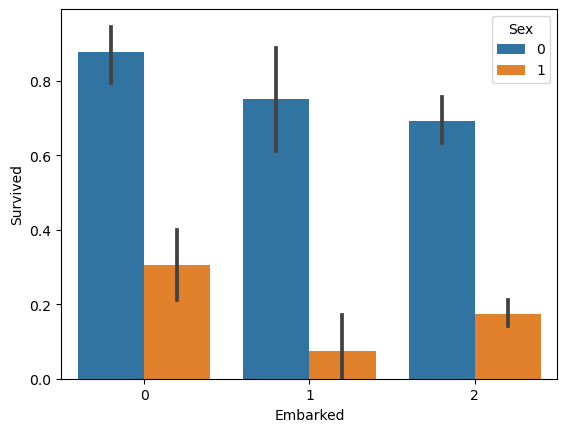

In [147]:
sns.barplot(data=df,x='Embarked',y='Survived', hue='Sex')
plt.title("") 

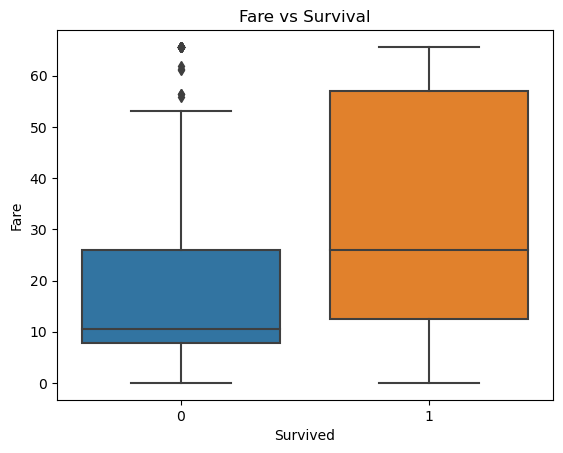

In [148]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

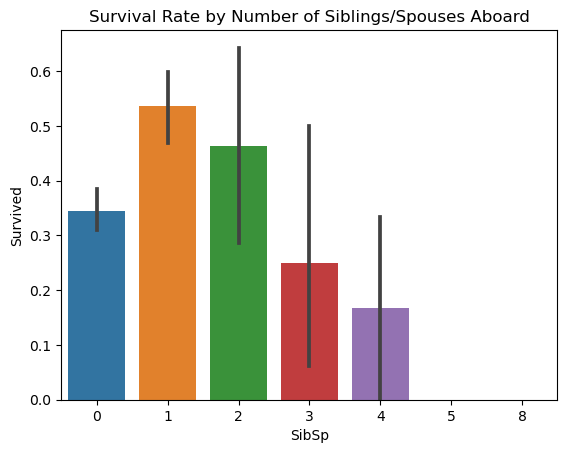

In [149]:
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.show()

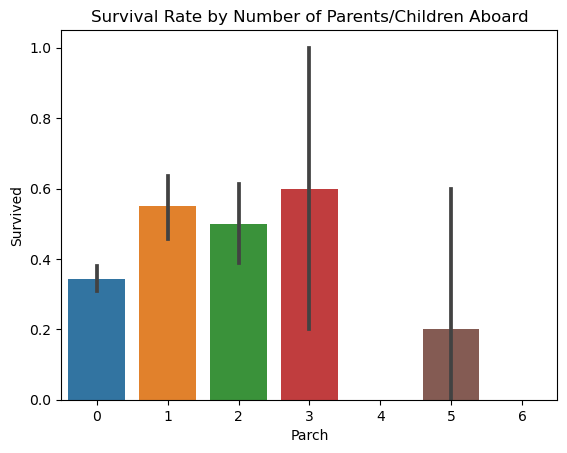

In [150]:
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

# Basic Feature-Level Inferences from Visuals

1. Females are having highest Survival rate
2. People who are in class 1 having slightly high chances of survuval
3. People who paid more have higher chances of survival
4. Passengers with 1–2 family members had better survival chances.
5. Passengers with large families (4–6) often had lower survival.